# WEB SCRAPING

In [ ]:
import yfinance as yf
import pandas as pd

In [ ]:
tickers = {
    'GOLD_ETF': 'GLD',   # Gold ETF SPDR
    'SP': '^GSPC',       # S&P 500 Index
    'DJ': '^DJI',        # Dow Jones Index
    'EG': 'EGO',         # Eldorado Gold Corporation
    'EU': 'EURUSD=X',    # EUR/USD Exchange rate
    'OF': 'BZ=F',        # Brent Crude Oil Futures
    'OS': 'CL=F',        # Crude Oil WTI Futures
    'SF': 'SI=F',        # Silver Futures
    'USB': '^TNX',       # US Bond Rate
    'PLT': 'PL=F',       # Platinum Futures
    'PLD': 'PA=F',       # Palladium Futures
    'GDX': 'GDX',        # Gold Miners ETF
    'USO': 'USO',        # Oil ETF USO
    'USDI': 'DX-Y.NYB'   # US Dollar Index
}

In [ ]:
all_data = pd.DataFrame()

for name, ticker in tickers.items():
    print(f"Downloading data for {name} ({ticker})...")
    data = yf.download(ticker, start='2007-07-30', end='2024-10-18', interval='1d')

    if not data.empty:

        data = data.add_prefix(f"{name}_")
        data = data.rename(columns={f"{name}_Adj Close": name})


        if all_data.empty:
            all_data = data[[name]]
        else:
            all_data = pd.concat([all_data, data[[name]]], axis=1)


        file_name = f'{name}_data.csv'
        data.to_csv(file_name)
        print(f"Data for {name} saved to {file_name}")
    else:
        print(f"No data found for {name} ({ticker})")


all_data = all_data.dropna(how='all')


all_data.reset_index(inplace=True)


all_data.to_csv('data_union.csv', index=False)
print("Combined data (union of dates) saved to data_union.csv")

[*********************100%***********************]  1 of 1 completed


Data for GOLD_ETF saved to GOLD_ETF_data.csv


[*********************100%***********************]  1 of 1 completed


Data for SP saved to SP_data.csv


[*********************100%***********************]  1 of 1 completed


Data for DJ saved to DJ_data.csv


[*********************100%***********************]  1 of 1 completed


Data for EG saved to EG_data.csv


[*********************100%***********************]  1 of 1 completed


Data for EU saved to EU_data.csv


[*********************100%***********************]  1 of 1 completed


Data for OF saved to OF_data.csv


[*********************100%***********************]  1 of 1 completed


Data for OS saved to OS_data.csv


[*********************100%***********************]  1 of 1 completed


Data for SF saved to SF_data.csv


[*********************100%***********************]  1 of 1 completed


Data for USB saved to USB_data.csv


[*********************100%***********************]  1 of 1 completed


Data for PLT saved to PLT_data.csv


[*********************100%***********************]  1 of 1 completed


Data for PLD saved to PLD_data.csv


[*********************100%***********************]  1 of 1 completed


Data for GDX saved to GDX_data.csv


[*********************100%***********************]  1 of 1 completed


Data for USO saved to USO_data.csv


[*********************100%***********************]  1 of 1 completed


Data for USDI saved to USDI_data.csv
Combined data (union of dates) saved to data_union.csv


# Data Security:

Encrypting the CSV File

In [ ]:
import os
from cryptography.fernet import Fernet

os.environ['ENCRYPTION_KEY'] = 'xkVPTzI4UElXYmZUVGVNN0pXZFdSUElMdmNvdFBucFI='

key = os.getenv('ENCRYPTION_KEY')


if key:
    cipher_suite = Fernet(key.encode())
    print("Encryption key retrieved successfully!")
else:
    raise EnvironmentError("ENCRYPTION_KEY not set in the environment")



def encrypt_file(file_name):

    with open(file_name, 'rb') as file:
        file_data = file.read()


    encrypted_data = cipher_suite.encrypt(file_data)


    encrypted_file_name = f"encrypted_{file_name}"
    with open(encrypted_file_name, 'wb') as encrypted_file:
        encrypted_file.write(encrypted_data)
    print(f"File {file_name} encrypted and saved as {encrypted_file_name}")

# encrypting a CSV file (after saving it)
encrypt_file('data_union.csv')


Encryption key retrieved successfully!
File data_union.csv encrypted and saved as encrypted_data_union.csv


Decrypting the CSV File

In [ ]:
def decrypt_file(encrypted_file_name):

    with open(encrypted_file_name, 'rb') as encrypted_file:
        encrypted_data = encrypted_file.read()


    decrypted_data = cipher_suite.decrypt(encrypted_data)


    decrypted_file_name = f"decrypted_{encrypted_file_name.split('encrypted_')[-1]}"
    with open(decrypted_file_name, 'wb') as decrypted_file:
        decrypted_file.write(decrypted_data)
    print(f"File {encrypted_file_name} decrypted and saved as {decrypted_file_name}")

# decrypting the encrypted CSV file
decrypt_file('encrypted_data_union.csv')

File encrypted_data_union.csv decrypted and saved as decrypted_data_union.csv


Reading the Decrypted CSV File

In [ ]:
dataset = pd.read_csv("decrypted_data_union.csv", parse_dates=["Date"])

# DATA PRE-PROCESSING


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Date      4494 non-null   datetime64[ns, UTC]
 1   GOLD_ETF  4337 non-null   object             
 2   SP        4337 non-null   object             
 3   DJ        4337 non-null   object             
 4   EG        4337 non-null   object             
 5   EU        4468 non-null   object             
 6   OF        4283 non-null   object             
 7   OS        4335 non-null   object             
 8   SF        4334 non-null   object             
 9   USB       4335 non-null   object             
 10  PLT       4009 non-null   object             
 11  PLD       4059 non-null   object             
 12  GDX       4337 non-null   object             
 13  USO       4337 non-null   object             
 14  USDI      4336 non-null   object             
dtypes: datetime64[ns, UTC

In [ ]:
# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending=True)

,0
Date,1
EU,27
GOLD_ETF,158
SP,158
DJ,158
EG,158
GDX,158
USO,158
USDI,159
OS,160


In [ ]:
# Apply forward fill to the entire DataFrame
dataset.ffill(inplace=True)

# Apply backward fill on the PLD column
dataset['PLD'] = dataset['PLD'].bfill()

# Missing Values/Null Values Count
dataset.isna().sum().sort_values(ascending=True)

,0
GOLD_ETF,0
SP,0
DJ,0
EG,0
EU,0
OF,0
OS,0
SF,0
USB,0
PLT,0


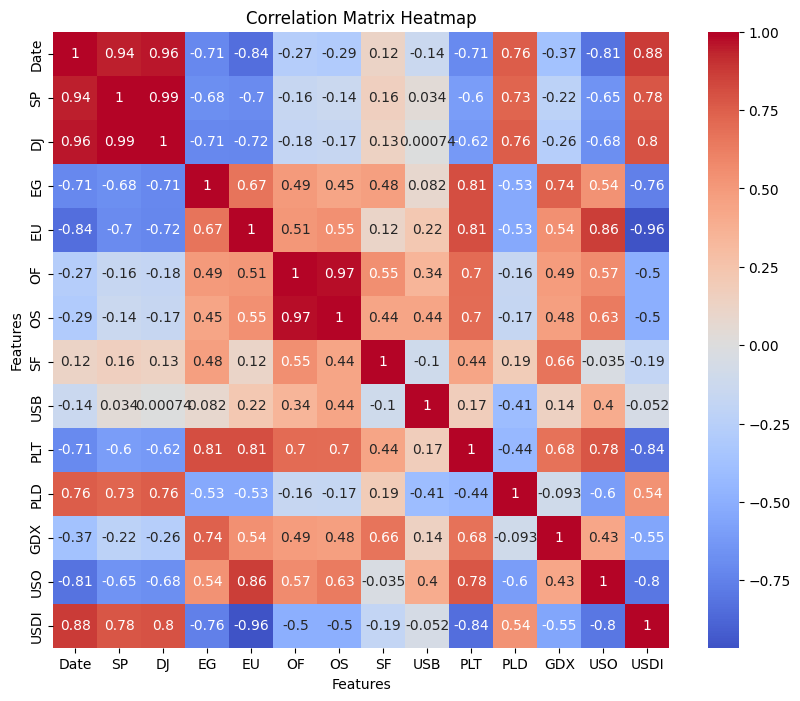

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation = dataset.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation, cmap='coolwarm', center=0, annot=True, square=True)

plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.show()


# DATA WRANGLING


In [ ]:
dataset.set_index("Date", inplace=True)

 change in Gold price through date

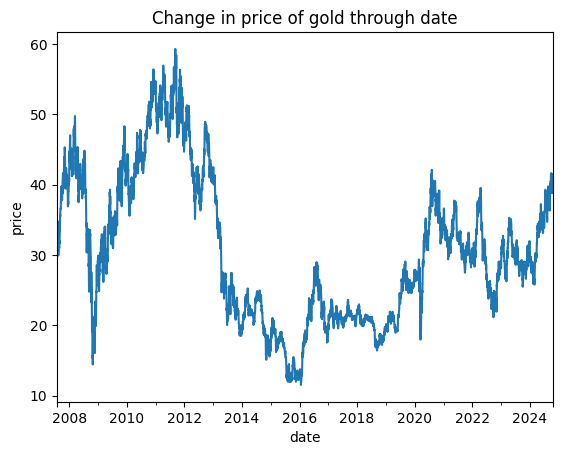

In [ ]:
# plot price of gold for each increasing day
dataset["GDX"].plot()
plt.title("Change in price of gold through date")
plt.xlabel("date")
plt.ylabel("price")
plt.show()

Trend in Gold Prices Using Moving Averages

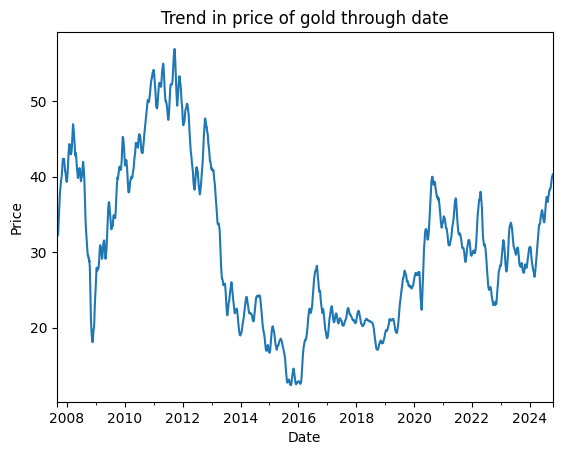

In [ ]:
# Apply rolling mean with window size of 20
dataset["price_trend"] = dataset["GDX"].rolling(window=20).mean()


dataset.reset_index(inplace=True)


dataset.set_index("Date", inplace=True)


dataset["price_trend"].iloc[19:].plot()

plt.title("Trend in price of gold through date")
plt.xlabel("Date")
plt.ylabel("Price")


plt.show()



Distribution of Columns

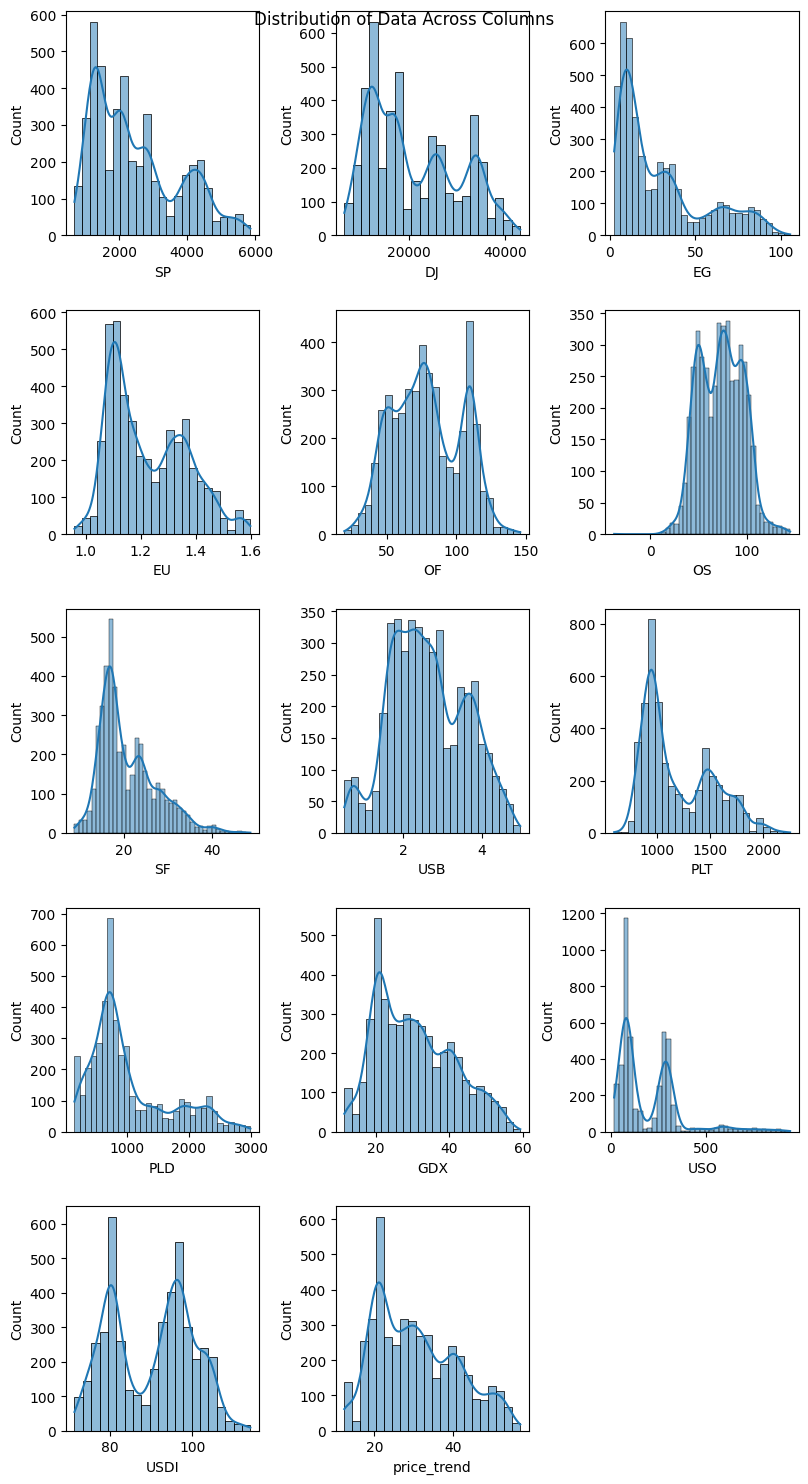

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns


columns_to_drop = ['index', 'level_0']

temp = dataset.drop(columns=columns_to_drop, errors='ignore').select_dtypes(include=['float64', 'int64']).columns.tolist()


num_columns = len(temp)
cols = 3
rows = math.ceil(num_columns / cols)


fig = plt.figure(figsize=(8, rows * 3))


fig.suptitle('Distribution of Data Across Columns')

for i, item in enumerate(temp):
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=dataset, x=item, kde=True)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


In [ ]:
skewness = dataset.drop("Date", axis=1, errors='ignore').skew(axis=0, skipna=True)
print(skewness)

SP             0.725695
DJ             0.482602
EG             1.090511
EU             0.539388
OF             0.124477
OS             0.082516
SF             0.984894
USB            0.139011
PLT            0.738127
PLD            1.082884
GDX            0.472261
USO            1.748245
USDI          -0.039865
price_trend    0.470541
dtype: float64


Handling Outliers

In [ ]:
import numpy as np
dataset["USO"] = dataset["USO"]\
    .apply(lambda x: np.sqrt(x))

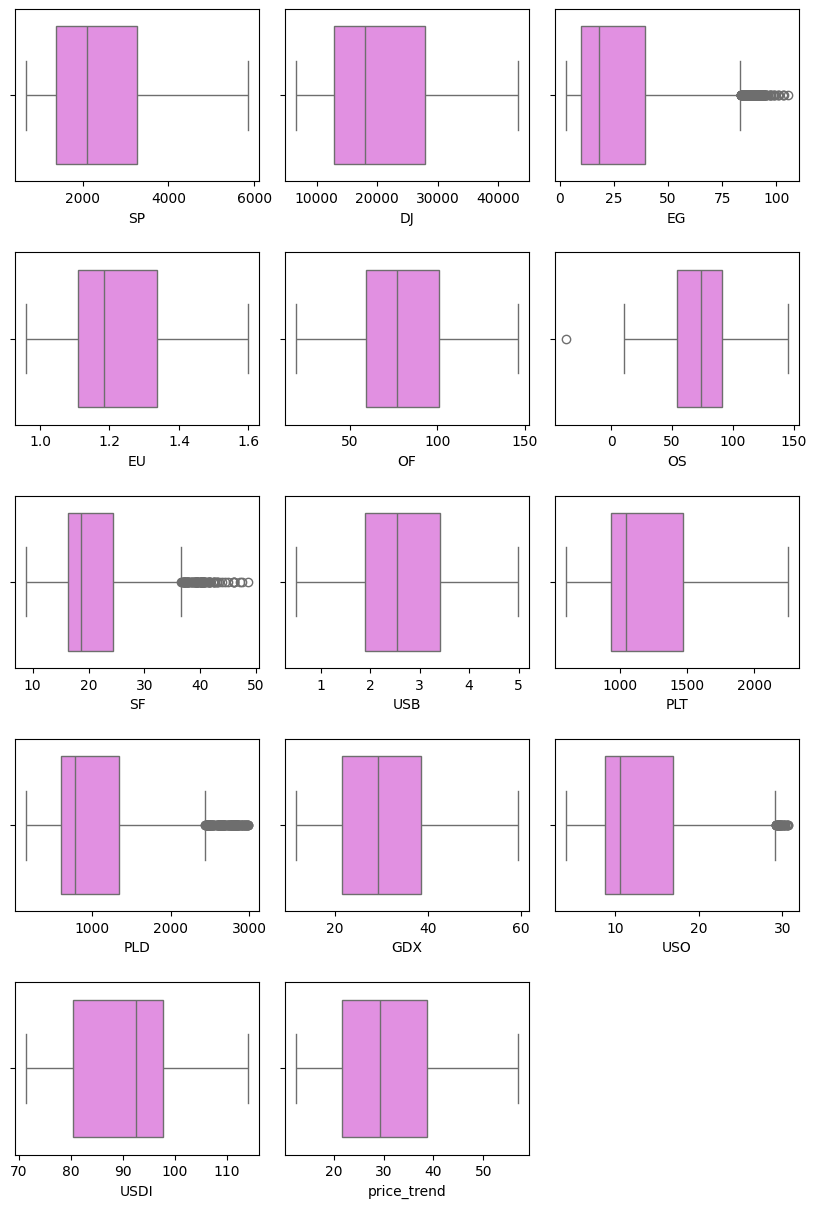

In [ ]:
import math
import matplotlib.pyplot as plt
import seaborn as sns


fig = plt.figure(figsize=(8, 12))

columns_to_drop = ['index', 'level_0']

temp = dataset.drop(columns=columns_to_drop, errors='ignore').select_dtypes(include=['float64', 'int64']).columns.tolist()


num_columns = len(temp)
cols = 3
rows = math.ceil(num_columns / cols)


for i, item in enumerate(temp):
    plt.subplot(rows, cols, i + 1)
    sns.boxplot(data=dataset, x=item, color='violet')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()


In [ ]:
def outlier_removal(column):

    upper_limit = column.quantile(.95)

    lower_limit = column.quantile(.05)

    column.loc[(column > upper_limit)] = upper_limit
    column.loc[(column < lower_limit)] = lower_limit
    return column

In [ ]:
dataset[['SP','DJ','EG','EU','OS','SF','USB','PLT','PLD','GDX','USO','USDI','price_trend']] = \
    dataset[['SP','DJ','EG','EU','OS','SF','USB','PLT','PLD','GDX','USO','USDI','price_trend']].apply(outlier_removal)

# VERSION CONTROL

Saving the Dataset with Versioning:

In [ ]:
import os
from datetime import datetime

# Function to rename an existing CSV file with a timestamp
def rename_csv_file(existing_file, timestamp=None):

    if not timestamp:
        timestamp = datetime.now().strftime('%Y %m %d')


    file_name, file_extension = os.path.splitext(existing_file)
    new_file_name = f"{file_name}_{timestamp}{file_extension}"

    os.rename(existing_file, new_file_name)
    print(f"File renamed to: {new_file_name}")

existing_csv_file = "decrypted_data_union.csv"
rename_csv_file(existing_csv_file)


File renamed to: decrypted_data_union_2024 10 20.csv


Audit Log for Version Control:

In [ ]:
import csv
from datetime import datetime


def log_version_change(action, file_name):
    with open('audit_log.csv', mode='a', newline='') as file:
        writer = csv.writer(file)

        writer.writerow([datetime.now(), action, file_name])
    print(f"Logged action: {action} for {file_name}")

log_version_change('Dataset updated with consistent web data', 'decrypted_data_union_2024 10 20.csv')


Logged action: Dataset updated with consistent web data for decrypted_data_union_2024 10 20.csv


In [ ]:
encrypt_file('decrypted_data_union_2024 10 20.csv')

File decrypted_data_union_2024 10 20.csv encrypted and saved as encrypted_decrypted_data_union_2024 10 20.csv
